# Write a Python Program for Adaptive Thresholding

In [1]:
from ctypes import c_int32
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
!wget -q -O livingroom.tif "https://drive.google.com/uc?export=download&id=152bXetIYM2kD5p_q_D3Mh0QAK_Xp8Hx-"

In [4]:
image=Image.open('livingroom.tif')
image=image.convert("L")

In [5]:
def my_global(a):
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,1)
    y=plt.hist(a.flatten(),256,[0,256],linewidth=1.0)
    m,n=a.shape
    div=int((m*n))/2
    sum=0
    T=0
    for i in range(len(y[0])):
        sum=sum+y[0][i]
        if(sum>div):
            T=i
            break;
    T=np.uint8(input("Enter the threshold: "))
    print("Threshold = ",T)
    r,c=a.shape
    GT=np.zeros((r,c))
    sum1=0
    sum2=0
    c1=0
    c2=0
    for i in range(r): #ROW
        for j in range(c): #COLUMN
            if(a[i,j]>=T):
                sum1=sum1+a[i,j]
                c1=c1+1
            else:
                sum2=sum2+a[i,j]
                c2=c2+1
    avg1=sum1/c1
    avg2=sum2/c2
    T_new=(avg1+avg2)/2
    print("Improved threshold = ",T_new)
    for i in range(r):
        for j in range(c):
            if(a[i,j]>=T_new):
                GT[i,j]=255
            else:
                GT[i,j]=0

    return GT


Threshold =  124
Improved threshold =  126.42882156197606
Threshold =  167
Improved threshold =  157.91303046230877
Threshold =  45
Improved threshold =  70.03076714949694
Threshold =  190
Improved threshold =  153.8406669002674


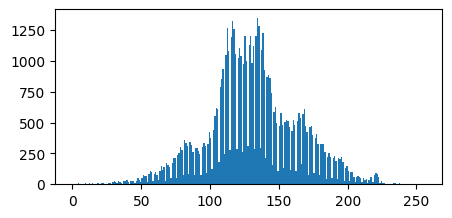

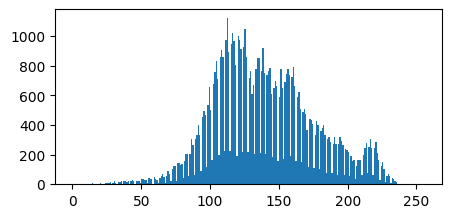

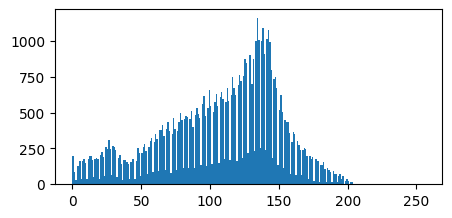

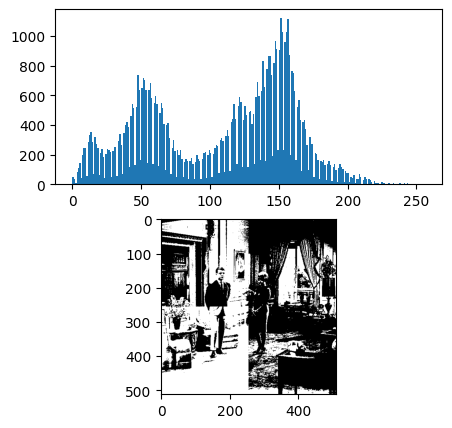

In [6]:
a=np.array(image)
m,n=a.shape
A=a[0:int(m/2),0:int(n/2)]
B=a[0:int(m/2),int(n/2):int(n)]
C=a[int(m/2):int(m),0:int(n/2)]
D=a[int(m/2):int(m),int(n/2):int(n)]


t1=my_global(A)
t2=my_global(B)
t3=my_global(C)
t4=my_global(D)


out1=np.hstack((t1,t2))
out2=np.hstack((t3,t4))
out=np.vstack((out1,out2))
plt.subplot(2,1,2)
plt.imshow(out,cmap="gray")